# **EDA (Análisis Exploratorio de los Datos)**
##En este proceso se procede a observar, los datos en relación a su comportamiento, distribución e interacción entre si, e indentificar la utilidad.

In [14]:
#Se importan las principales herramientas a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

### Se importa el archivo ***'movies.csv'*** una vez estando dispuesto para ser analizado

In [15]:
movies = pd.read_csv('/content/movies.csv')
movies.head(15)

,budget,id,popularity,release_date,revenue,title,vote_average,vote_count,actor,director,return,release_year,tag
0,30000000,862,21.946943,1995-10-30,373554033.0,Toy Story,7.7,5415.0,"['Tom Hanks', 'Tim Allen', 'Don Rickles', 'Jim...",John Lasseter,12.451801,1995,Led Woody Andy toy live happily room Andy birt...
1,65000000,8844,17.015539,1995-12-15,262797249.0,Jumanji,6.9,2413.0,"['Robin Williams', 'Jonathan Hyde', 'Kirsten D...",Joe Johnston,4.043035,1995,When sibling Judy Peter discover enchanted boa...
2,0,15602,11.712900,1995-12-22,0.0,Grumpier Old Men,6.5,92.0,"['Walter Matthau', 'Jack Lemmon', 'Ann-Margret...",Howard Deutch,0.000000,1995,family wedding reignites ancient feud next-doo...
3,16000000,31357,3.859495,1995-12-22,81452156.0,Waiting to Exhale,6.1,34.0,"['Whitney Houston', 'Angela Bassett', 'Loretta...",Forest Whitaker,5.090760,1995,Cheated mistreated stepped woman holding breat...
4,0,11862,8.387519,1995-02-10,76578911.0,Father of the Bride Part II,5.7,173.0,"['Steve Martin', 'Diane Keaton', 'Martin Short...",Charles Shyer,inf,1995,Just George Banks recovered daughter wedding r...
5,60000000,949,17.924927,1995-12-15,187436818.0,Heat,7.7,1886.0,"['Al Pacino', 'Robert De Niro', 'Val Kilmer', ...",Michael Mann,3.123947,1995,Obsessive master thief Neil McCauley lead top-...
6,58000000,11860,6.677277,1995-12-15,0.0,Sabrina,6.2,141.0,"['Harrison Ford', 'Julia Ormond', 'Greg Kinnea...",Sydney Pollack,0.000000,1995,ugly duckling undergone remarkable change stil...
7,0,45325,2.561161,1995-12-22,0.0,Tom and Huck,5.4,45.0,"['Jonathan Taylor Thomas', 'Brad Renfro', 'Rac...",Peter Hewitt,0.000000,1995,mischievous young boy Tom Sawyer witness murde...
8,35000000,9091,5.231580,1995-12-22,64350171.0,Sudden Death,5.5,174.0,"['Jean-Claude Van Damme', 'Powers Boothe', 'Do...",Peter Hyams,1.838576,1995,International action superstar Jean Claude Van...
9,58000000,710,14.686036,1995-11-16,352194034.0,GoldenEye,6.6,1194.0,"['Pierce Brosnan', 'Sean Bean', 'Izabella Scor...",Martin Campbell,6.072311,1995,James Bond must unmask mysterious head Janus S...


### Con la observación de las primeras 15 filas, se puede observar inconsistencia, en los valores de la columna ***'return'***, ya que aparece el valor **Infinito(inf)** dentro de otros valores numéricos. Es importante comenzar por aquí.

In [ ]:
movies['return'].value_counts()

0.000000     38024
inf           2034
1.000000        20
2.000000        12
4.000000        11
             ...  
17.000000        1
0.277950         1
5.411653         1
4.777778         1
0.282600         1
Name: return, Length: 5233, dtype: int64

### Al momento de contar los valores, se puede observar que hay una gran cantidad de valores 0, y 2022 valores de valores infinitos, es importante recordad que la columna ***'return'*** es el resultado de haber hecho la división entre las columnas ***'revenue'*** y ***'budget'***. Para corregir, se imputará el valor 0 dónde los valores sean ***infinito(inf)***.

In [16]:
movies.replace([np.inf], 0, inplace=True)

### Procederemos a graficar la relación entre el presupuesto y el retorno, considerando el año de de lanzamiento.

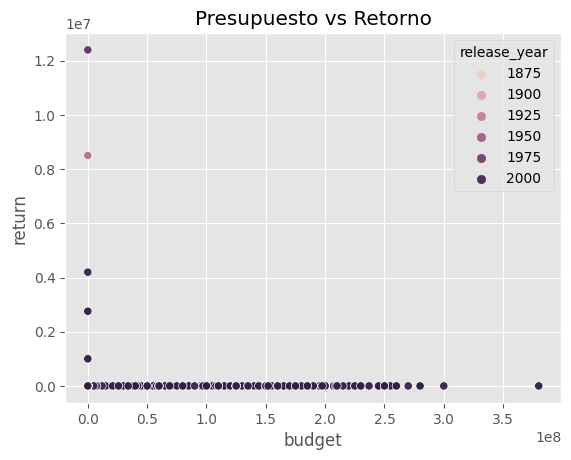

In [ ]:
ax = sns.scatterplot (x='budget',
                      y='return',
                     hue='release_year', data=movies)
ax.set_title('Presupuesto vs Retorno')
plt.show()

### Entorno alrededor del año 2000, parece que puede haber una mejor apreciación de los datos financieros de las películas. Ahora bien, ya que el año de lanzamiento parece tener una importancia respecto a algunas variables, se puede proceder a hacer un digrama de pares considerando el año de lanzamiento.

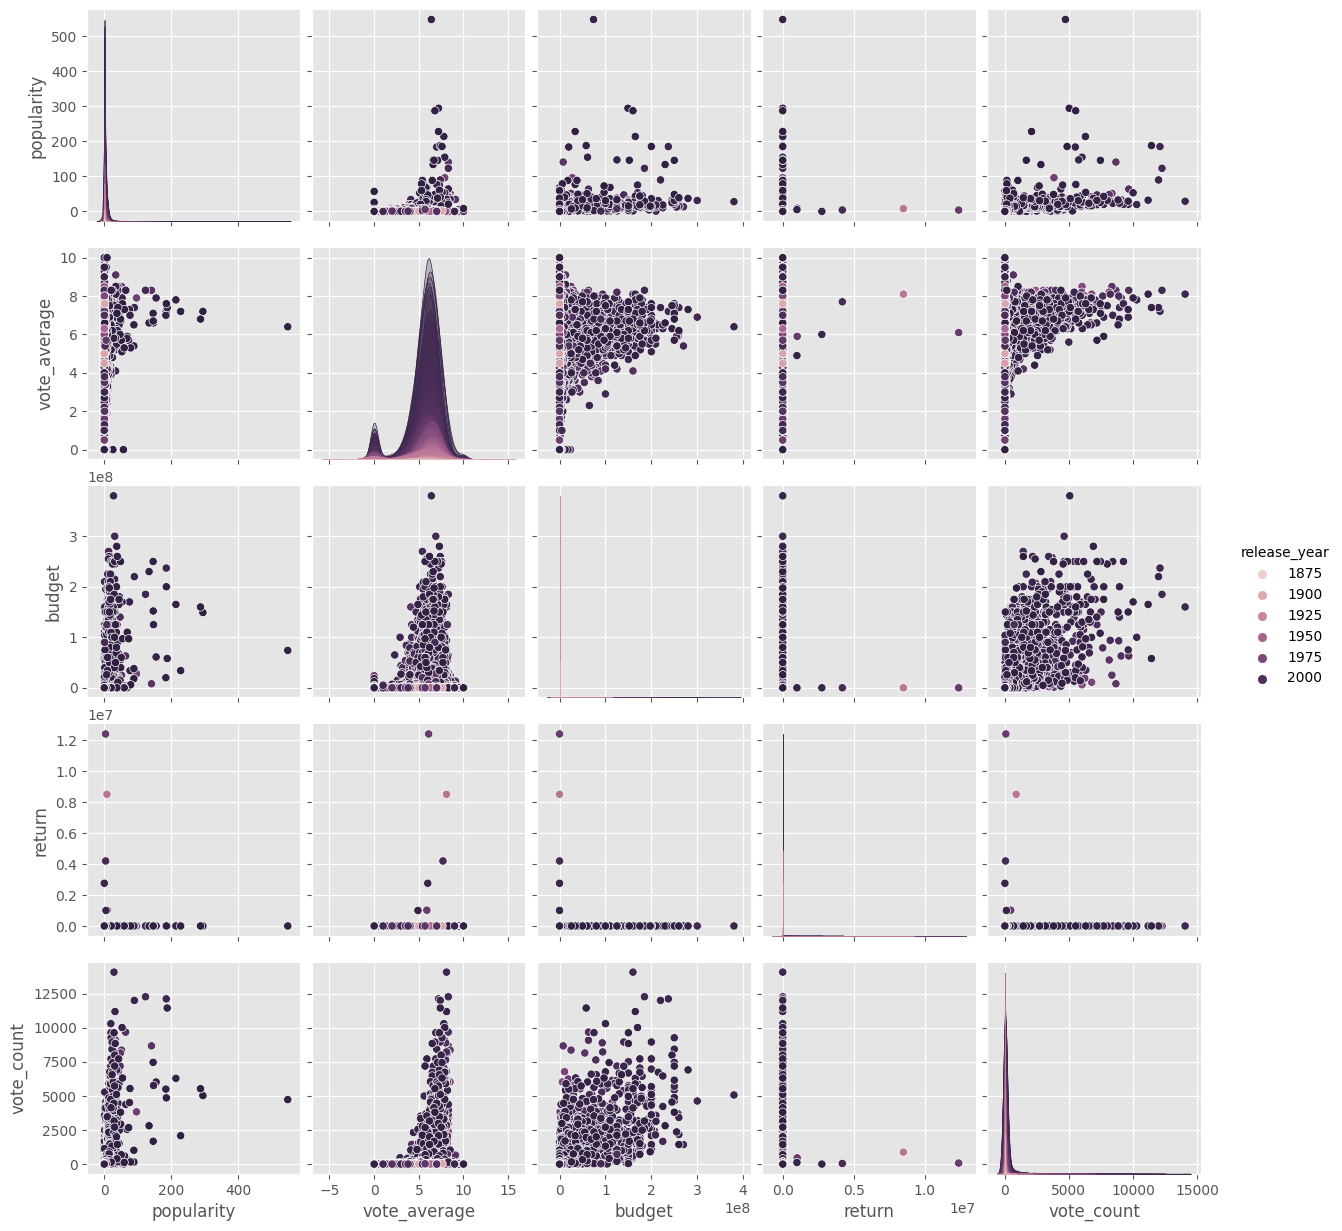

In [ ]:
sns.pairplot(movies, vars=['popularity','vote_average','budget','return','vote_count'], hue='release_year')
plt.show()

### Se puede observar que existen algunas interacciones importante entre algunas categorias sobre todo con el presupuesto, así mismo queda evidenciado que mientras mas reciente sea la película disponemos de mayor cantidad de datos. Pero ahora hagamos una matriz de correlación incluendo el año de lanzamiento.

<Axes: >

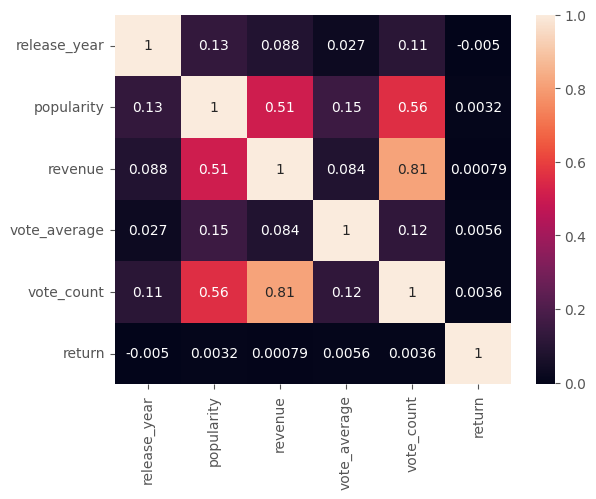

In [ ]:
sns.heatmap(movies[['release_year','popularity','revenue','vote_average','vote_count','return']].corr(), annot=True)

### Observando la matriz de correlación se puede observar que el año de lanzamiento solo presenta relación es con la cantidad de peliculas, sin embargo la relación mas significativa está entre la recaudación y la cantidad de votos.

Text(0.5, 0, 'Cantidad')

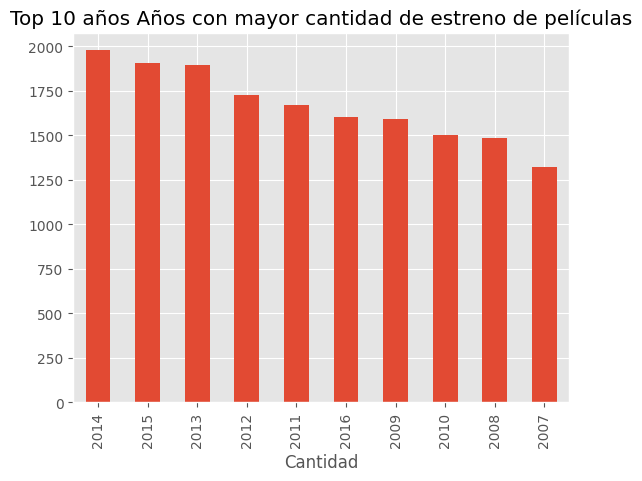

In [ ]:
ax  = movies['release_year'].value_counts().head(10) \
      .plot(kind='bar', title= 'Top 10 años Años con mayor cantidad de estreno de películas')
ax.set_xlabel('Año de lanzamiento')
ax.set_xlabel('Cantidad')

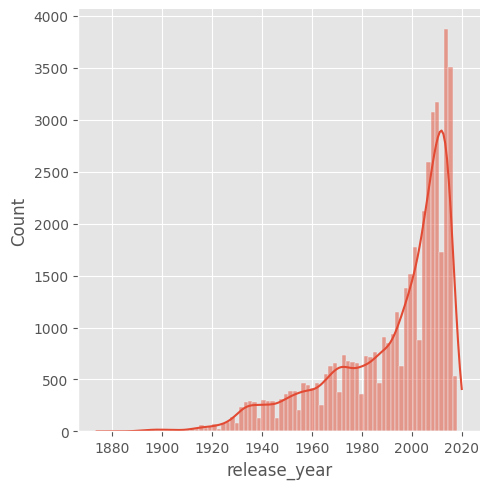

In [ ]:
sns.displot(data=movies, x=movies['release_year'], kde=True)


### Ahora bien, es el momento de analizar los datos que no son numéricos, comenzando por los títulos de películas.

In [17]:
#Se muestra el top 10 de los títulos mas usados
movies['title'].value_counts().head(10)

Blackout                13
Cinderella              11
Alice in Wonderland      9
Hamlet                   9
The Promise              8
Les Misérables           8
Beauty and the Beast     8
King Lear                8
Treasure Island          7
A Christmas Carol        7
Name: title, dtype: int64

In [18]:
movies[movies['title'].isin(movies['title'].value_counts().head(5).index)][['title', 'release_year', 'actor', 'director']].sort_values(by='release_year', ascending=False)

,title,release_year,actor,director
40522,The Promise,2017,"['Oscar Isaac', 'Charlotte Le Bon', 'Christian...",Terry George
44529,The Promise,2016,"['Imogen Poots', 'Daniel Brühl', 'Jens Söring'...",Marcus Vetter
28718,Cinderella,2015,"['Lily James', 'Cate Blanchett', 'Richard Madd...",Kenneth Branagh
43821,Blackout,2015,['Charlie Durkin'],Callie T. Wiser
45393,Cinderella,2012,"['Kristina Asmus', 'Nikita Efremov', 'Artyom T...",Sergey Ivanov
28445,Cinderella,2011,"['Vanessa Hessler', 'Flavio Parenti', 'Natalia...",Christian Duguay
14951,Alice in Wonderland,2010,"['Mia Wasikowska', 'Johnny Depp', 'Anne Hathaw...",Tim Burton
29787,Blackout,2010,"['Jalil Lespert', 'Cyril Gueï', 'Philippe Nahon']",Jean-Christophe Klotz
18966,Hamlet,2009,"['David Tennant', 'Patrick Stewart', 'Penny Do...",Gregory Doran
13311,Blackout,2008,"['Petteri Summanen', 'Ismo Kallio', 'Eppu Salm...",JP Siili


### Algunos de los títulos mas repetidos, se encontraron algunos valores duplicados

In [19]:
movies.drop_duplicates(subset=['release_date', 'actor'])

,budget,id,popularity,release_date,revenue,title,vote_average,vote_count,actor,director,return,release_year,tag
0,30000000,862,21.946943,1995-10-30,373554033.0,Toy Story,7.7,5415.0,"['Tom Hanks', 'Tim Allen', 'Don Rickles', 'Jim...",John Lasseter,12.451801,1995,Led Woody Andy toy live happily room Andy birt...
1,65000000,8844,17.015539,1995-12-15,262797249.0,Jumanji,6.9,2413.0,"['Robin Williams', 'Jonathan Hyde', 'Kirsten D...",Joe Johnston,4.043035,1995,When sibling Judy Peter discover enchanted boa...
2,0,15602,11.712900,1995-12-22,0.0,Grumpier Old Men,6.5,92.0,"['Walter Matthau', 'Jack Lemmon', 'Ann-Margret...",Howard Deutch,0.000000,1995,family wedding reignites ancient feud next-doo...
3,16000000,31357,3.859495,1995-12-22,81452156.0,Waiting to Exhale,6.1,34.0,"['Whitney Houston', 'Angela Bassett', 'Loretta...",Forest Whitaker,5.090760,1995,Cheated mistreated stepped woman holding breat...
4,0,11862,8.387519,1995-02-10,76578911.0,Father of the Bride Part II,5.7,173.0,"['Steve Martin', 'Diane Keaton', 'Martin Short...",Charles Shyer,0.000000,1995,Just George Banks recovered daughter wedding r...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45446,0,30840,5.683753,1991-05-13,0.0,Robin Hood,5.7,26.0,"['Patrick Bergin', 'Uma Thurman', 'David Morri...",John Irvin,0.000000,1991,Yet another version classic epic enough variat...
45447,0,111109,0.178241,2011-11-17,0.0,Century of Birthing,9.0,3.0,"['Angel Aquino', 'Perry Dizon', 'Hazel Orencio...",Lav Diaz,0.000000,2011,artist struggle finish work storyline cult pla...
45448,0,67758,0.903007,2003-08-01,0.0,Betrayal,3.8,6.0,"['Erika Eleniak', 'Adam Baldwin', 'Julie du Pa...",Mark L. Lester,0.000000,2003,When one hit go wrong professional assassin en...
45449,0,227506,0.003503,1917-10-21,0.0,Satan Triumphant,0.0,0.0,"['Iwan Mosschuchin', 'Nathalie Lissenko', 'Pav...",Yakov Protazanov,0.000000,1917,small town live two brother one minister one h...


### Se procederá a modificar el dataframe filtrando las peliculas entre 1990 y 2020, adicionalmente se seleccionarán aleatoriamente 15000 filas, por lo que igual se tendría una muestra lo suficientemente representativa de los datos.


In [20]:
movies['release_year'] = pd.to_datetime(movies['release_year'], format='%Y')
movies = movies.loc[(movies['release_year'].dt.year >= 1990) & (movies['release_year'].dt.year <= 2020)].head(12000)

In [21]:
#A veces algunos valores aparecen duplicados luego de este proceso, por lo que hay que volver a pasar la función
movies.drop_duplicates(subset=['release_date', 'actor'])

,budget,id,popularity,release_date,revenue,title,vote_average,vote_count,actor,director,return,release_year,tag
0,30000000,862,21.946943,1995-10-30,373554033.0,Toy Story,7.7,5415.0,"['Tom Hanks', 'Tim Allen', 'Don Rickles', 'Jim...",John Lasseter,12.451801,1995-01-01,Led Woody Andy toy live happily room Andy birt...
1,65000000,8844,17.015539,1995-12-15,262797249.0,Jumanji,6.9,2413.0,"['Robin Williams', 'Jonathan Hyde', 'Kirsten D...",Joe Johnston,4.043035,1995-01-01,When sibling Judy Peter discover enchanted boa...
2,0,15602,11.712900,1995-12-22,0.0,Grumpier Old Men,6.5,92.0,"['Walter Matthau', 'Jack Lemmon', 'Ann-Margret...",Howard Deutch,0.000000,1995-01-01,family wedding reignites ancient feud next-doo...
3,16000000,31357,3.859495,1995-12-22,81452156.0,Waiting to Exhale,6.1,34.0,"['Whitney Houston', 'Angela Bassett', 'Loretta...",Forest Whitaker,5.090760,1995-01-01,Cheated mistreated stepped woman holding breat...
4,0,11862,8.387519,1995-02-10,76578911.0,Father of the Bride Part II,5.7,173.0,"['Steve Martin', 'Diane Keaton', 'Martin Short...",Charles Shyer,0.000000,1995-01-01,Just George Banks recovered daughter wedding r...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19915,0,91930,6.078336,2011-04-30,0.0,The Perfect Family,4.7,7.0,"['Kathleen Turner', 'Emily Deschanel', 'Jason ...",Anne Renton,0.000000,2011-01-01,Kathleen Turner star suburban mother devout Ca...
19916,12500000,119431,7.429822,2012-10-05,0.0,Halo 4: Forward Unto Dawn,6.4,240.0,"['Tom Green', 'Anna Popplewell', 'Iain Belcher...",Stewart Hendler,0.000000,2012-01-01,Set backdrop UNSC military academy group highb...
19917,33000000,85446,7.859968,2012-07-26,140470746.0,Step Up Revolution,6.7,679.0,"['Kathryn McCormick', 'Ryan Guzman', 'Stephen ...",Scott Speer,4.256689,2012-01-01,Emily arrives Miami aspiration become professi...
19919,0,62069,0.874978,2010-11-25,0.0,Four More Years,6.6,7.0,"['Björn Kjellman', 'Eric Ericson', 'Tova Magnu...",Tova Magnusson,0.000000,2010-01-01,Political party leader David Holst one Sweden ...


### Ahora bien, evaluemos la columna 'tag', es la que probablemente nos permitirá mas adelante realizar nuestro modelo de recomendación. No parece común que alguien quiera maratonear las 11 versiones de Cinderella, si el modelo solo se basa en el título.

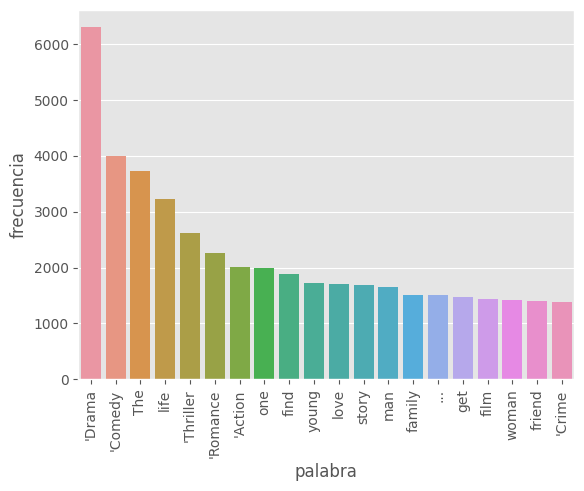

In [22]:
from collections import Counter

words = movies['tag'].str.split(expand=True).stack()
word_counts = Counter(words)
top_20_words = word_counts.most_common(20)

df_top_20_words = pd.DataFrame(top_20_words, columns=['palabra', 'frecuencia'])
ax = sns.barplot(x='palabra', y='frecuencia', data=df_top_20_words)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

### En la gráfica anterior se mostró las palabras mas comunes en la columna 'tag', es mas un poco mas común ahora que una persona elige una película con las etiquetas de drama, amor, life, young y state el sistema pueda llegar a recomendar varias que tengan relación con esas etiquetas.

###Ahora ya se puede construir una nube de palabra, con las que se repoten con mayor frecuencia.

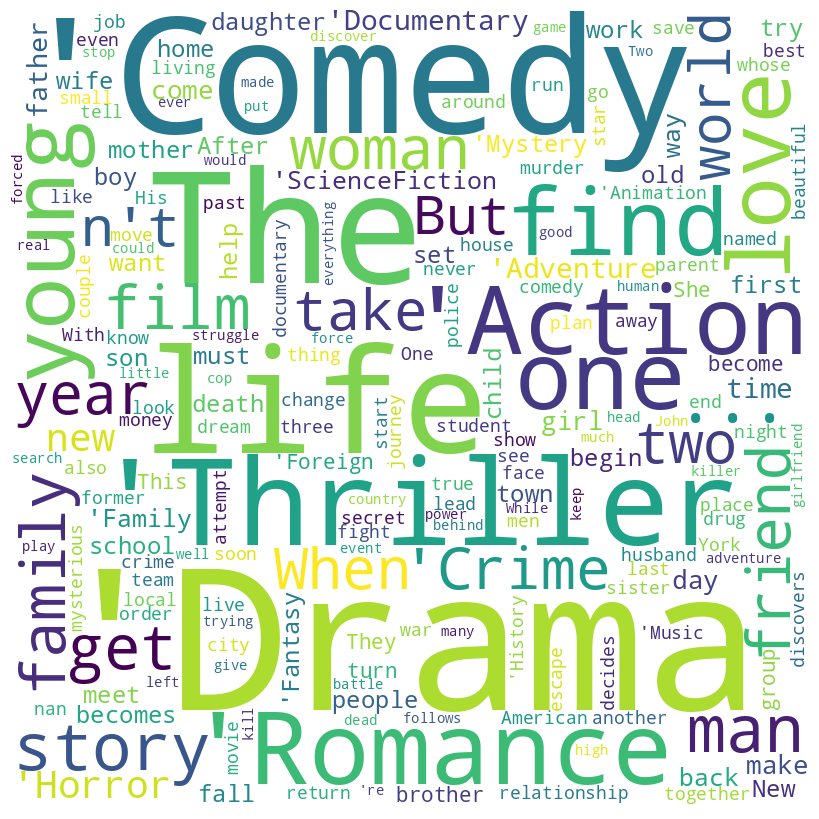

In [23]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate_from_frequencies(word_counts)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

###Ahora bien, estaría todo listo para crear el modelo de recomendación, corresponde ahora exportar el archivo, con las modificaciones realizadas en este proceso.

In [24]:
import pickle
pickle.dump(movies, open('movie_post_eda.pkl','wb'))